In [1]:
from dataset import FungusDataset
import torch
from matplotlib import pyplot as plt
from dataset.normalization import get_normalization_transform, denormalize
from torchvision.transforms import Compose, Lambda
from util.augmentation import *
import numpy as np
import os
os.chdir('..')

In [2]:
augmentation = Compose([
    #NumpyRotation(),
    NumpyVerticalFlip(),
    NumpyHorizontalFlip(),
    NumpyAffineTransform(scale=(0.8, 1.2), shear=(np.deg2rad(-15), np.deg2rad(15))),
])

sigma = 0.01
transform = Compose([
    NumpyGaussianNoise(sigma=sigma),
    NumpyToTensor(),
    get_normalization_transform(),
])

dataset = FungusDataset(
    imgs_dir='/mnt/drive/preprocessed/',
    masks_dir='/mnt/ssd/fungus/masks_2_3/',
    random_crop_size=250,
    number_of_fg_slices_per_image=16,
    number_of_bg_slices_per_image=1,
    train=True,
    transform=transform,
    prescale=0.5,
    augmentation=augmentation)

In [3]:
loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=1,
    shuffle=True,
    num_workers=0)

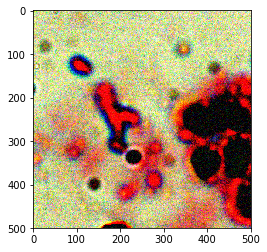

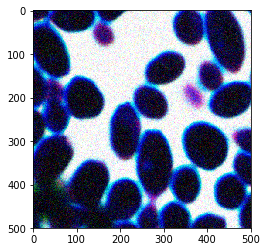

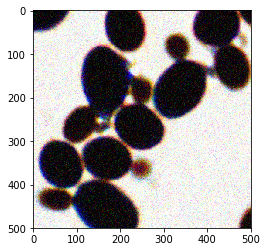

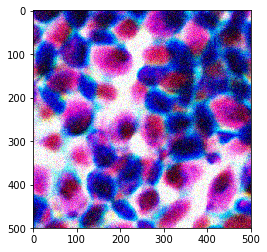

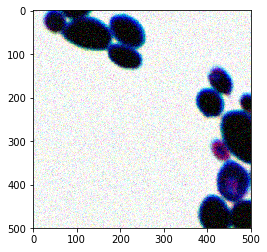

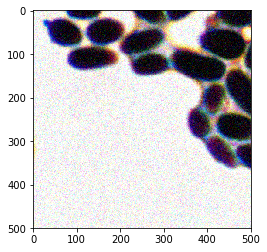

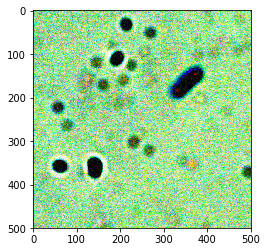

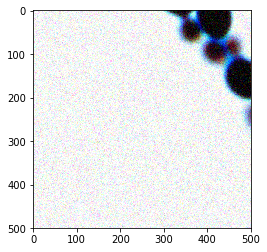

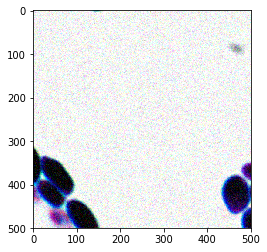

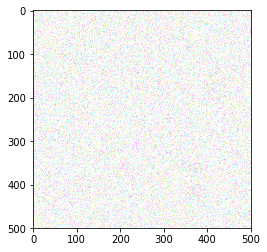

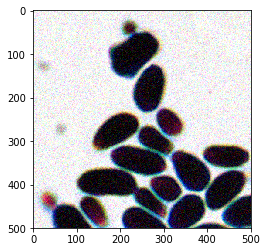

In [4]:
for i, s in enumerate(loader):
    if i > 10:
        break
    img = s['image'].squeeze().permute(1, 2, 0)
    img = denormalize(img)
    plt.figure()
    plt.imshow(img)
